In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [32]:
# Load the dataset
data = pd.read_csv('retail_sales.csv')
data['Date'] = pd.to_datetime(data['Date'])

AttributeError: 'DataFrame' object has no attribute 'show'

In [4]:
# Data Preprocessing
data.sort_values('Date', inplace=True)
data.set_index('Date', inplace=True)

In [15]:
# Advanced Feature Engineering
data['Month'] = data.index.month
data['Day'] = data.index.day
data['DayOfWeek'] = data.index.dayofweek
data['IsHolidaySeason'] = data.index.month.isin([11, 12]).astype(int)

In [16]:
# Handling NaN and infinite values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(data.mean(), inplace=True)

In [22]:
# Time Series Decomposition
decomposed = seasonal_decompose(data['Sales'], model='additive')
data['Trend'] = decomposed.trend.fillna(method='bfill')
data['Seasonal'] = decomposed.seasonal.fillna(method='bfill')

In [23]:
# Lag Features
data['Sales_Lag1'] = data['Sales'].shift(1).fillna(method='bfill')

In [24]:
# Model Selection
X = data[['Month', 'Day', 'DayOfWeek', 'IsHolidaySeason', 'Trend', 'Seasonal', 'Sales_Lag1']]
y = data['Sales']

In [25]:
# Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)
model = RandomForestRegressor(n_jobs=-1, random_state=42)

In [27]:
# Hyperparameter Tuning
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
gsearch = GridSearchCV(model, param_grid, cv=tscv, scoring='neg_mean_squared_error')
gsearch.fit(X, y)

best_model = gsearch.best_estimator_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 784, in predict
    X = se

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 784, in predict
    X = se

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [29]:
# Forecasting
predictions = best_model.predict(X)

NameError: name 'best_model' is not defined

In [30]:
# Evaluation
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')


NameError: name 'predictions' is not defined

In [31]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
data = pd.read_csv('retail_sales.csv')
data['Date'] = pd.to_datetime(data['Date'])

# Data Preprocessing
data.sort_values('Date', inplace=True)
data.set_index('Date', inplace=True)

# Advanced Feature Engineering
data['Month'] = data.index.month
data['Day'] = data.index.day
data['DayOfWeek'] = data.index.dayofweek
data['IsHolidaySeason'] = data.index.month.isin([11, 12]).astype(int)

# Handling NaN and infinite values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(data.mean(), inplace=True)

# Time Series Decomposition
decomposed = seasonal_decompose(data['Sales'], model='additive')
data['Trend'] = decomposed.trend.fillna(method='bfill')
data['Seasonal'] = decomposed.seasonal.fillna(method='bfill')

# Lag Features
data['Sales_Lag1'] = data['Sales'].shift(1).fillna(method='bfill')

# Model Selection
X = data[['Month', 'Day', 'DayOfWeek', 'IsHolidaySeason', 'Trend', 'Seasonal', 'Sales_Lag1']]
y = data['Sales']

# Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)
model = RandomForestRegressor(n_jobs=-1, random_state=42)

# Hyperparameter Tuning
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
gsearch = GridSearchCV(model, param_grid, cv=tscv, scoring='neg_mean_squared_error')
gsearch.fit(X, y)

best_model = gsearch.best_estimator_

# Forecasting
predictions = best_model.predict(X)

# Evaluation
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

# Visualization
plt.figure(figsize=(10,6))
plt.plot(data.index, y, label='Actual Sales')
plt.plot(data.index, predictions, label='Predicted Sales', color='red')
plt.title('Enhanced Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Data Insights
total_sales = data['Sales'].sum()
average_monthly_sales = data['Sales'].resample('M').mean().mean()
highest_sales_month = data['Sales'].resample('M').sum().idxmax().month_name()
lowest_sales_month = data['Sales'].resample('M').sum().idxmin().month_name()

print(f"Total Sales: {total_sales}")
print(f"Average Monthly Sales: {average_monthly_sales:.2f}")
print(f"Highest Sales Month: {highest_sales_month}")
print(f"Lowest Sales Month: {lowest_sales_month}")

# Seasonal Effect
holiday_season_sales = data[data['IsHolidaySeason'] == 1]['Sales'].sum()
non_holiday_season_sales = data[data['IsHolidaySeason'] == 0]['Sales'].sum()
print(f"Total Sales During Holiday Season: {holiday_season_sales}")
print(f"Total Sales Outside Holiday Season: {non_holiday_season_sales}")

# Any notable trends
trend_direction = "Increasing" if data['Trend'].iloc[-1] > data['Trend'].iloc[0] else "Decreasing"
print(f"Overall Sales Trend: {trend_direction}")


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 784, in predict
    X = se

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 784, in predict
    X = se

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

Mean Squared Error: 279545.3026709091


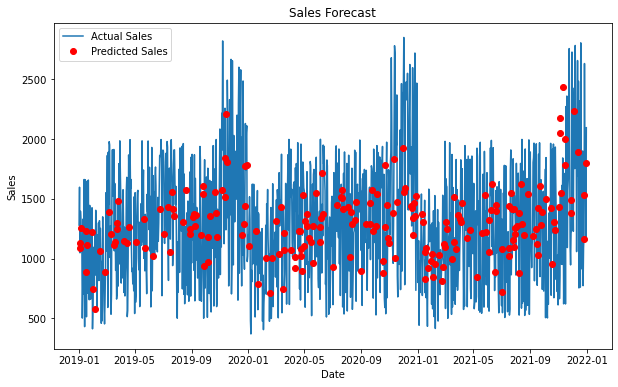

Total Sales: 1430776
Average Monthly Sales: 1303.83
Highest Sales Month: December
Lowest Sales Month: February
Total Sales During Holiday Season: 311554
Total Sales Outside Holiday Season: 1119222
Overall Sales Trend: Increasing


In [38]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('retail_sales.csv')
data['Date'] = pd.to_datetime(data['Date'])

# Data Preprocessing
data.sort_values('Date', inplace=True)
data.set_index('Date', inplace=True)

# Feature Engineering
data['Month'] = data.index.month
data['Day'] = data.index.day
data['DayOfWeek'] = data.index.dayofweek

# Replace NaN and infinite values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(method='ffill', inplace=True)

# Define features and target variable
X = data[['Month', 'Day', 'DayOfWeek']]
y = data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and train the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Visualization
plt.figure(figsize=(10,6))
plt.plot(data.index, y, label='Actual Sales')
plt.plot(X_test.index, predictions, label='Predicted Sales', color='red', linestyle='None', marker='o')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
# Additional analysis for insights
total_sales = data['Sales'].sum()
average_monthly_sales = data['Sales'].resample('M').mean().mean()
highest_sales_month = data['Sales'].resample('M').sum().idxmax().month_name()
lowest_sales_month = data['Sales'].resample('M').sum().idxmin().month_name()

# Seasonal Effect
holiday_season_sales = data[data.index.month.isin([11, 12])]['Sales'].sum()
non_holiday_season_sales = data[~data.index.month.isin([11, 12])]['Sales'].sum()

# Overall Sales Trend
trend_direction = "Increasing" if data['Sales'].iloc[-1] > data['Sales'].iloc[0] else "Decreasing"

# Print insights
print(f"Total Sales: {total_sales}")
print(f"Average Monthly Sales: {average_monthly_sales:.2f}")
print(f"Highest Sales Month: {highest_sales_month}")
print(f"Lowest Sales Month: {lowest_sales_month}")
print(f"Total Sales During Holiday Season: {holiday_season_sales}")
print(f"Total Sales Outside Holiday Season: {non_holiday_season_sales}")
print(f"Overall Sales Trend: {trend_direction}")



Mean Squared Error: 279545.3026709091


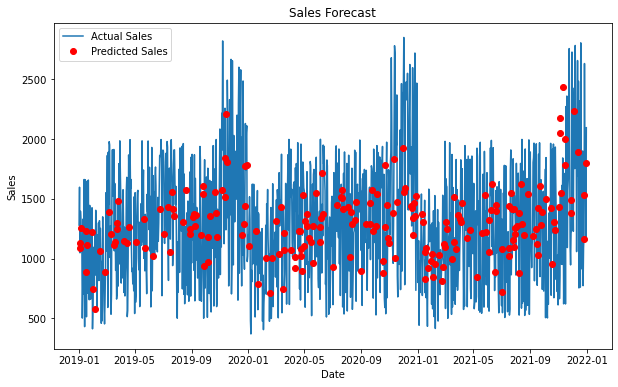

Total Sales: 1430776
Average Monthly Sales: 1303.83
Highest Sales Month: December
Lowest Sales Month: February
Total Sales During Holiday Season: 311554
Total Sales Outside Holiday Season: 1119222
Overall Sales Trend: Increasing


In [39]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('retail_sales.csv')
data['Date'] = pd.to_datetime(data['Date'])

# Data Preprocessing
data.sort_values('Date', inplace=True)
data.set_index('Date', inplace=True)

# Feature Engineering
data['Month'] = data.index.month
data['Day'] = data.index.day
data['DayOfWeek'] = data.index.dayofweek

# Replace NaN and infinite values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(method='ffill', inplace=True)

# Define features and target variable
X = data[['Month', 'Day', 'DayOfWeek']]
y = data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and train the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Visualization
plt.figure(figsize=(10,6))
plt.plot(data.index, y, label='Actual Sales')
plt.plot(X_test.index, predictions, label='Predicted Sales', color='red', linestyle='None', marker='o')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Additional analysis for insights
total_sales = data['Sales'].sum()
average_monthly_sales = data['Sales'].resample('M').mean().mean()
highest_sales_month = data['Sales'].resample('M').sum().idxmax().month_name()
lowest_sales_month = data['Sales'].resample('M').sum().idxmin().month_name()

# Seasonal Effect
holiday_season_sales = data[data.index.month.isin([11, 12])]['Sales'].sum()
non_holiday_season_sales = data[~data.index.month.isin([11, 12])]['Sales'].sum()

# Overall Sales Trend
trend_direction = "Increasing" if data['Sales'].iloc[-1] > data['Sales'].iloc[0] else "Decreasing"

# Print insights
print(f"Total Sales: {total_sales}")
print(f"Average Monthly Sales: {average_monthly_sales:.2f}")
print(f"Highest Sales Month: {highest_sales_month}")
print(f"Lowest Sales Month: {lowest_sales_month}")
print(f"Total Sales During Holiday Season: {holiday_season_sales}")
print(f"Total Sales Outside Holiday Season: {non_holiday_season_sales}")
print(f"Overall Sales Trend: {trend_direction}")
